In [1]:
%matplotlib inline

# From Dr. V:

This section is what I pulled from the scikit-image gallery. You can find the docs for the whole library here: https://scikit-image.org/

I'll make a new section below where I work through this example more slowly.


# Blob Detection

Blobs are bright on dark or dark on bright regions in an image. In
this example, blobs are detected using 3 algorithms. The image used
in this case is the Hubble eXtreme Deep Field. Each bright dot in the
image is a star or a galaxy.

## Laplacian of Gaussian (LoG)
This is the most accurate and slowest approach. It computes the Laplacian
of Gaussian images with successively increasing standard deviation and
stacks them up in a cube. Blobs are local maximas in this cube. Detecting
larger blobs is especially slower because of larger kernel sizes during
convolution. Only bright blobs on dark backgrounds are detected. See
:py:meth:`skimage.feature.blob_log` for usage.

## Difference of Gaussian (DoG)
This is a faster approximation of LoG approach. In this case the image is
blurred with increasing standard deviations and the difference between
two successively blurred images are stacked up in a cube. This method
suffers from the same disadvantage as LoG approach for detecting larger
blobs. Blobs are again assumed to be bright on dark. See
:py:meth:`skimage.feature.blob_dog` for usage.

## Determinant of Hessian (DoH)
This is the fastest approach. It detects blobs by finding maximas in the
matrix of the Determinant of Hessian of the image. The detection speed is
independent of the size of blobs as internally the implementation uses
box filters instead of convolutions. Bright on dark as well as dark on
bright blobs are detected. The downside is that small blobs (<3px) are not
detected accurately. See :py:meth:`skimage.feature.blob_doh` for usage.


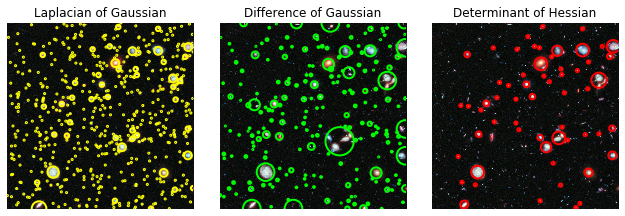

In [2]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

# From Dr. V:

This is me working through the example more slowly now.

In [13]:
import matplotlib.pyplot as plt
import numpy as np

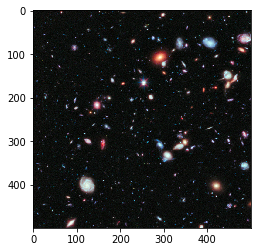

In [5]:
plt.imshow(image)

What an awesome picture! Now I'm going to work through their example.

The first few lines they do I've copied below. It looks like they're first pulling a portion of the Hubble deep field (which must be included in the library as sample data). Then they convert it to grayscale for analysis.

At first I thought the third line was doing a natural log, but that's not right. I checked the help on `blob_log()` to learn more.

In [6]:
image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

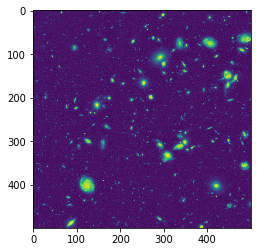

In [18]:
plt.imshow(image_gray)
#Look it's a single colormap now. imshow defaults to this color scheme.

In [17]:
help(blob_log)

Help on function blob_log in module skimage.feature.blob:

blob_log(image, min_sigma=1, max_sigma=50, num_sigma=10, threshold=0.2, overlap=0.5, log_scale=False, *, exclude_border=False)
    Finds blobs in the given grayscale image.
    
    Blobs are found using the Laplacian of Gaussian (LoG) method [1]_.
    For each blob found, the method returns its coordinates and the standard
    deviation of the Gaussian kernel that detected the blob.
    
    Parameters
    ----------
    image : 2D or 3D ndarray
        Input grayscale image, blobs are assumed to be light on dark
        background (white on black).
    min_sigma : scalar or sequence of scalars, optional
        the minimum standard deviation for Gaussian kernel. Keep this low to
        detect smaller blobs. The standard deviations of the Gaussian filter
        are given for each axis as a sequence, or as a single number, in
        which case it is equal for all axes.
    max_sigma : scalar or sequence of scalars, optional


So that third line is looking for blobs. Apparently it's that easy to look for them. That's so cool! The parameters in the call to `blob_log` are search parameters: how big the blob can be, how bright it should be, etc. But let's figure out what it's returning.

In [19]:
np.shape(blobs_log)

(549, 3)

The original image was 500x500. This shape is totally different. I'm going to scroll back through the help to figure out what it's telling me.

The helpfile tells me that it's giving me the (x,y) locations of each blob it found, as well as a number that corresponds to how big the blob is.

If I look back at the original example script, I see them calling two very similar functions: `blob_dog` and `blob_doh`. These must be the functions to look for blobs using other search strategies. I'm going to leave the choice of search strategy to the scientist who wants to find blobs, and focus on the code here.

The rest of the example script generating the final plots. Each shows the original Hubble deep field with the found blobs circled. The circles correspond to the size of the blob found. I'm going to try to generate just the first one below, to prove to myself that I understand what happened.

First off, there's that third column. It's a sigma, which can be converted to the radius of the blob according to the formula in the final Note. We're going to caluculate radii and overwrite that as the third column.

In [20]:
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

Now, we're going to get fancy. First, we'll plot the image. Then we'll iterate over the list of blobs found. For each blob, we'll plot a circle at the given location, using the given radius.

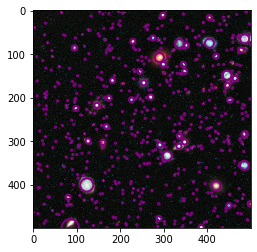

In [39]:
fig, ax = plt.subplots() #being a bit fancy with the way I start the plot because it's necessary to add in all the circles
plt.imshow(image)
for blob in blobs_log:
    y,x,r = blob #this line unpacks the values
    c = plt.Circle((x,y),r, color="purple", linewidth = 2, fill = False) #I made it purple because I wanted to
    ax.add_patch(c)

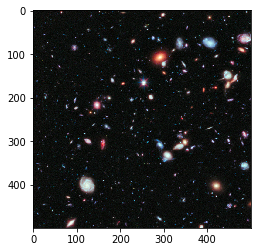

In [38]:
plt.imshow(image) #just replotting the raw data so that you can see the comparison with all the circles

## Challenges:
Can you change the color of my plot? Can you make the lines thicker or thinner? Can you fill in the circles?

Can you repeat this analysis with one of the other search strategies?

Can you change the parameters in the blob search to find more or fewer blobs?